In [1]:
import numpy as npy
import pandas as pds
import statsmodels.api as stm
import statsmodels.formula.api as stf
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import seaborn as sns

# grab the data
df= pds.read_csv("D:\Data\Spring23\AppliedML-JP\Lecture 4\CEOSAL2.csv")

#print the whole set of data
print (df)

     salary  age  college  grad  comten  ceoten  sales  profits  mktval  \
0      1161   49        1     1       9       2   6200      966   23200   
1       600   43        1     1      10      10    283       48    1100   
2       379   51        1     1       9       3    169       40    1100   
3       651   55        1     0      22      22   1100      -54    1000   
4       497   44        1     1       8       6    351       28     387   
..      ...  ...      ...   ...     ...     ...    ...      ...     ...   
172     264   63        1     0      42       3    334       43     480   
173     185   58        1     0      39       1    766       49     560   
174     387   71        1     1      32      13    432       28     477   
175    2220   63        1     1      18      18    277      -80     540   
176     445   69        1     0      23       0    249       31     828   

      lsalary    lsales    lmktval  comtensq  ceotensq   profmarg  
0    7.057037  8.732305  10.051

In [3]:
df.describe()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,865.864407,56.429379,0.971751,0.531073,22.502825,7.954802,3529.463277,207.830508,3600.316384,6.582848,7.231025,7.399410,656.683616,114.124294,6.420111
std,587.589281,8.421890,0.166152,0.500449,12.294735,7.150826,6088.654193,404.454296,6442.276020,0.606059,1.432086,1.133414,577.122655,212.565996,17.860742
min,100.000000,33.000000,0.000000,0.000000,2.000000,0.000000,29.000000,-463.000000,387.000000,4.605170,3.367296,5.958425,4.000000,0.000000,-203.076900
25%,471.000000,52.000000,1.000000,0.000000,12.000000,3.000000,561.000000,34.000000,644.000000,6.154858,6.329721,6.467699,144.000000,9.000000,4.230769
50%,707.000000,57.000000,1.000000,1.000000,23.000000,6.000000,1400.000000,63.000000,1200.000000,6.561031,7.244227,7.090077,529.000000,36.000000,6.833713
75%,1119.000000,62.000000,1.000000,1.000000,33.000000,11.000000,3500.000000,208.000000,3500.000000,7.020191,8.160519,8.160519,1089.000000,121.000000,10.947370
max,5299.000000,86.000000,1.000000,1.000000,58.000000,37.000000,51300.000000,2700.000000,45400.000000,8.575274,10.845450,10.723270,3364.000000,1369.000000,47.457630


In [41]:
df.keys()

Index(['salary', 'age', 'college', 'grad', 'comten', 'ceoten', 'sales',
       'profits', 'mktval', 'lsalary', 'lsales', 'lmktval', 'comtensq',
       'ceotensq', 'profmarg'],
      dtype='object')

In [2]:
df.head()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200,966,23200,7.057037,8.732305,10.051910,81,4,15.580650
1,600,43,1,1,10,10,283,48,1100,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169,40,1100,5.937536,5.129899,7.003066,81,9,23.668640
3,651,55,1,0,22,22,1100,-54,1000,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351,28,387,6.208590,5.860786,5.958425,64,36,7.977208


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    177 non-null    int64  
 1   age       177 non-null    int64  
 2   college   177 non-null    int64  
 3   grad      177 non-null    int64  
 4   comten    177 non-null    int64  
 5   ceoten    177 non-null    int64  
 6   sales     177 non-null    int64  
 7   profits   177 non-null    int64  
 8   mktval    177 non-null    int64  
 9   lsalary   177 non-null    float64
 10  lsales    177 non-null    float64
 11  lmktval   177 non-null    float64
 12  comtensq  177 non-null    int64  
 13  ceotensq  177 non-null    int64  
 14  profmarg  177 non-null    float64
dtypes: float64(4), int64(11)
memory usage: 20.9 KB


Text(0.5, 1.0, 'Histogram of CEO Salary')

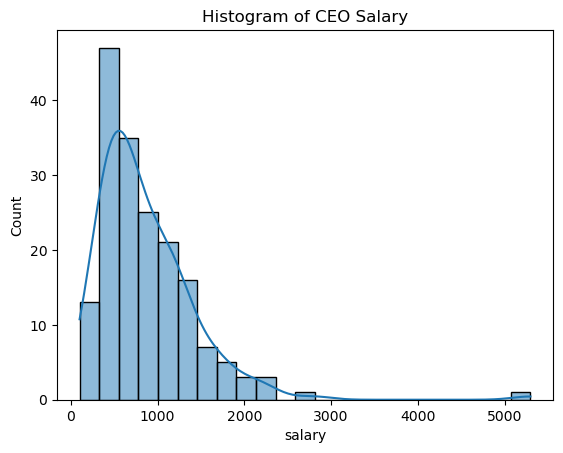

In [6]:
sns.histplot(data=df, x="salary", kde=True)
plt.title("Histogram of CEO Salary")

Text(0.5, 1.0, 'Scatterplot of Salary vs. Tenure')

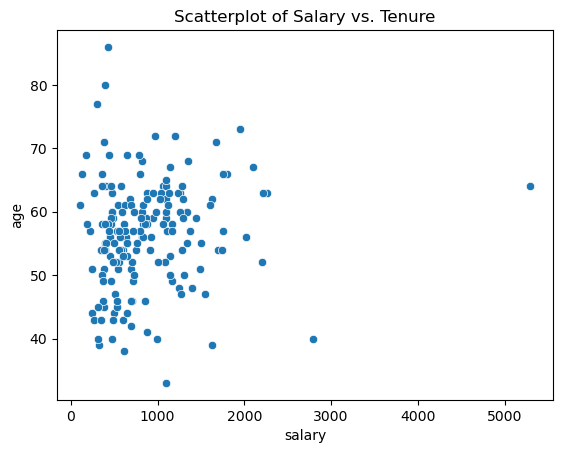

In [8]:
sns.scatterplot(data=df, x="salary", y="age")
plt.title("Scatterplot of Salary vs. Tenure")

Text(0.5, 1.0, 'Box Plot of Salary')

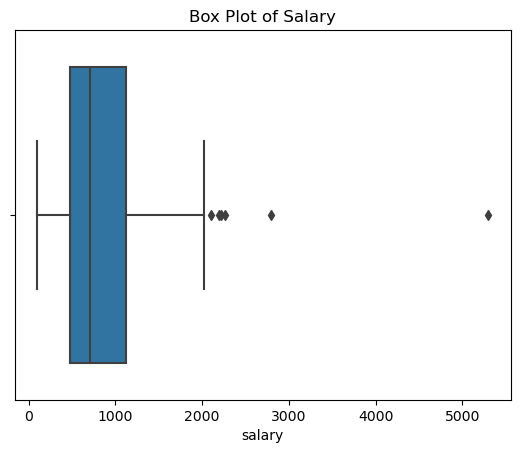

In [44]:
sns.boxplot(x='salary', data=df)
plt.title('Box Plot of Salary')

In [ ]:
We can see there is outlier so its better to remove it as it will affect the model

In [46]:
df.salary.sort_values(ascending=False)
df.iloc[102]

salary      5299.000000
age           64.000000
college        1.000000
grad           0.000000
comten        42.000000
ceoten        13.000000
sales       2400.000000
profits      119.000000
mktval      1500.000000
lsalary        8.575274
lsales         7.783224
lmktval        7.313221
comtensq    1764.000000
ceotensq     169.000000
profmarg       4.958333
Name: 102, dtype: float64

In [58]:
df=df[df.salary!=5299]

Text(0.5, 1.0, 'Countplot of Graduate Education')

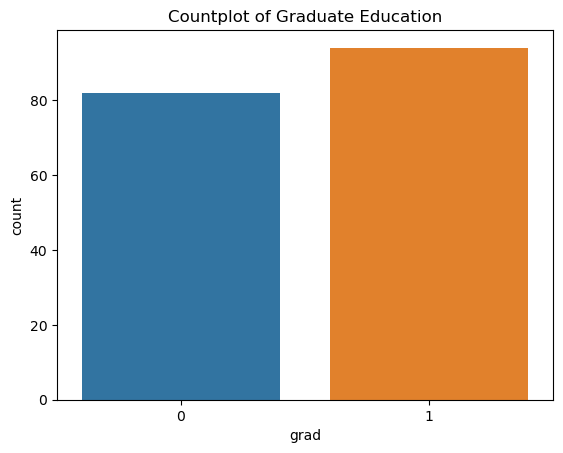

In [59]:
sns.countplot(x='grad', data=df)
plt.title('Countplot of Graduate Education')

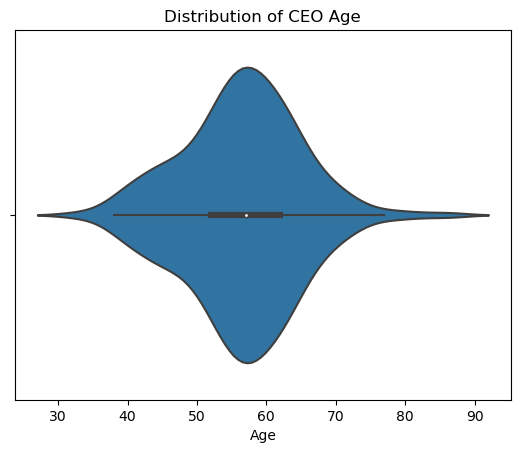

In [10]:
sns.violinplot(x='age', data=df)
plt.xlabel('Age')
plt.title('Distribution of CEO Age')
plt.show()

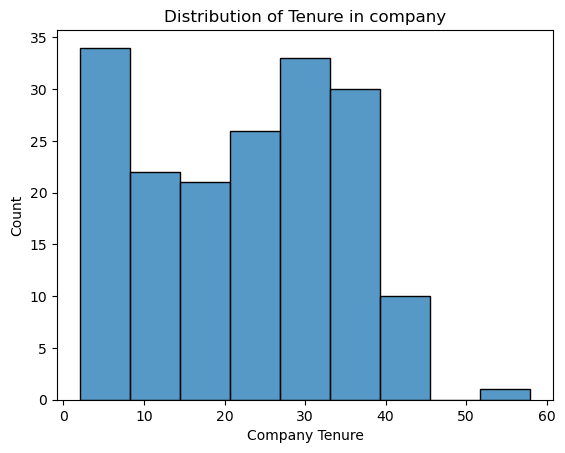

In [11]:
sns.histplot(x='comten', data=df)
plt.xlabel('Company Tenure')
plt.title('Distribution of Tenure in company')
plt.show()

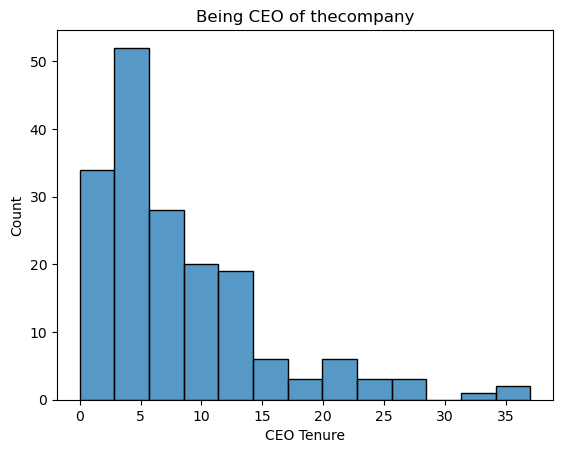

In [12]:
sns.histplot(x='ceoten', data=df)
plt.xlabel('CEO Tenure')
plt.title('Being CEO of thecompany')
plt.show()

Text(0, 0.5, 'years as ceo with company')

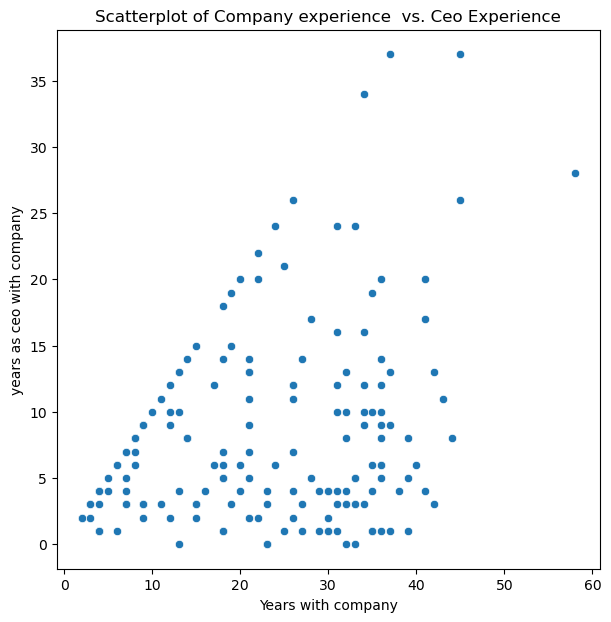

In [29]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x="comten", y="ceoten")
plt.title("Scatterplot of Company experience  vs. Ceo Experience")
plt.xlabel('Years with company')
plt.ylabel('years as ceo with company')


Text(0.5, 1.0, 'Scatterplot of Profits vs. Sales')

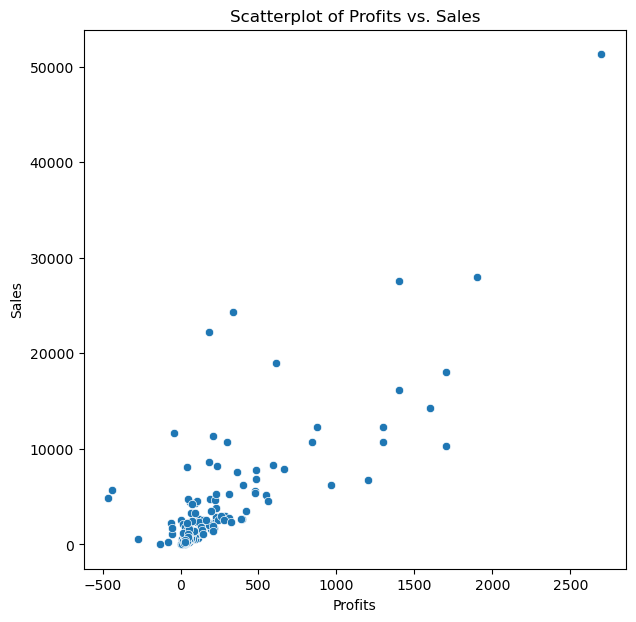

In [27]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x="profits", y="sales")
plt.xlabel('Profits')
plt.ylabel('Sales')
plt.title("Scatterplot of Profits vs. Sales")

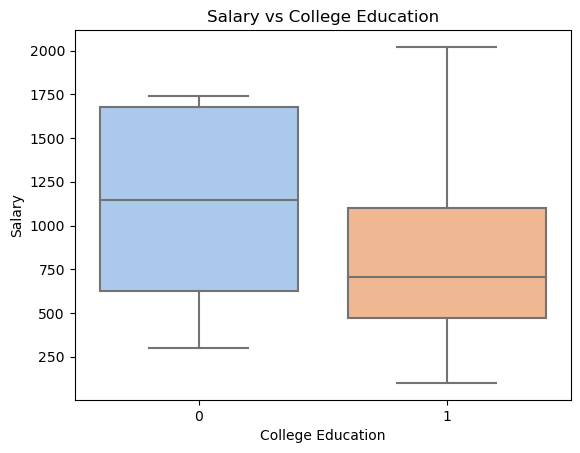

In [21]:
Noncollege_df = df[df['college'] == '0']
College_df = df[df['college'] == '1']
sns.boxplot(x='college', y='salary', data=df, palette='pastel', showfliers=False)
plt.title('Salary vs College Education')
plt.xlabel('College Education')
plt.ylabel('Salary')

plt.show()

Text(0, 0.5, 'years as ceo with company')

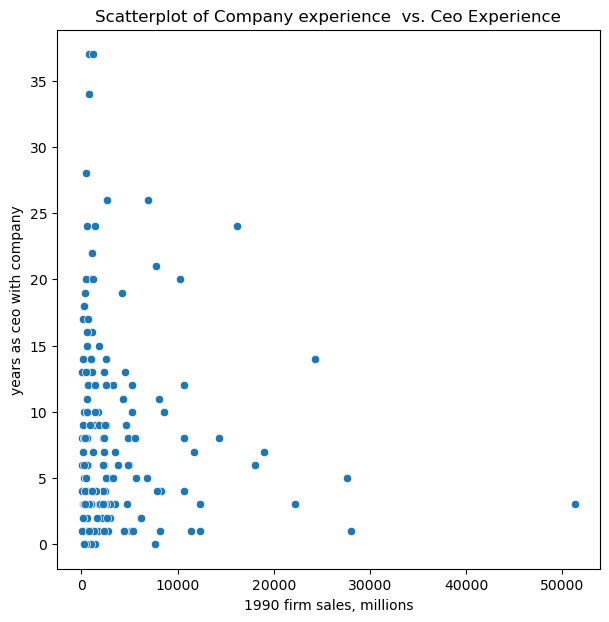

In [28]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x="sales", y="ceoten")
plt.title("Scatterplot of Company experience  vs. Ceo Experience")
plt.xlabel('1990 firm sales, millions')
plt.ylabel('years as ceo with company')

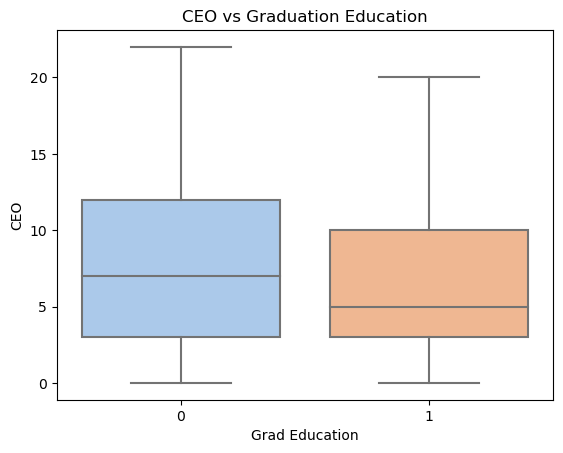

In [31]:
Nongrad_df = df[df['grad'] == '0']
Grad_df = df[df['grad'] == '1']
sns.boxplot(x='grad', y='ceoten', data=df, palette='pastel', showfliers=False)
plt.title('CEO vs Graduation Education')
plt.xlabel('Grad Education')
plt.ylabel('CEO')

plt.show()

Text(0, 0.5, 'Profits')

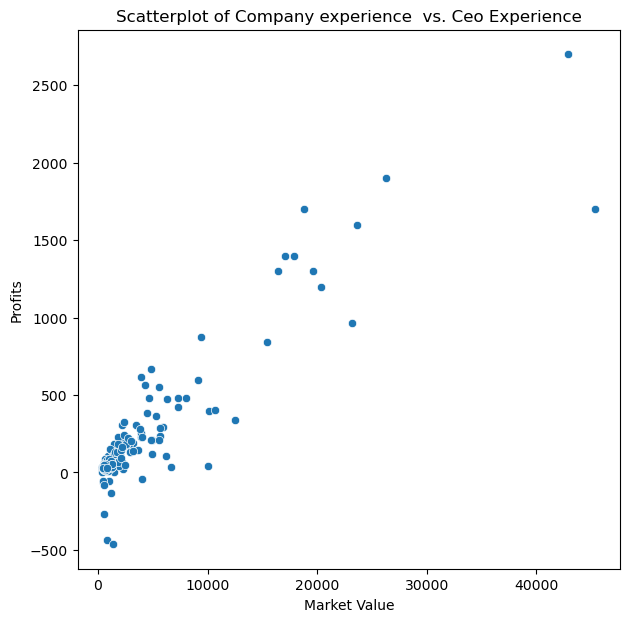

In [33]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x="mktval", y="profits")
plt.title("Scatterplot of Company experience  vs. Ceo Experience")
plt.xlabel('Market Value')
plt.ylabel('Profits')

C:\Users\abbie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'box plot of Age')

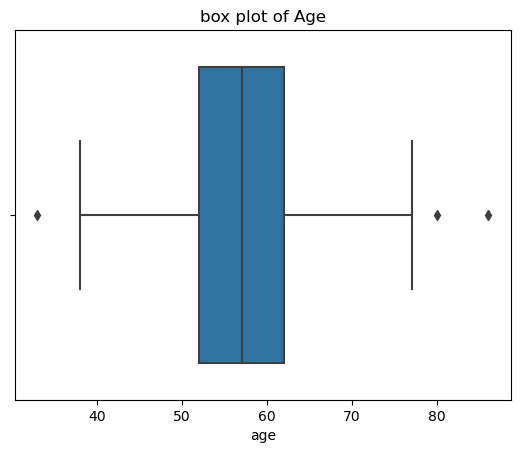

In [63]:
sns.boxplot(df.age)
plt.title("box plot of Age")

In [55]:
df.iloc[72]

salary      425.000000
age          86.000000
college       1.000000
grad          1.000000
comten       13.000000
ceoten       13.000000
sales        36.000000
profits      11.000000
mktval      644.000000
lsalary       6.052089
lsales        3.583519
lmktval       6.467699
comtensq    169.000000
ceotensq    169.000000
profmarg     30.555560
Name: 72, dtype: float64

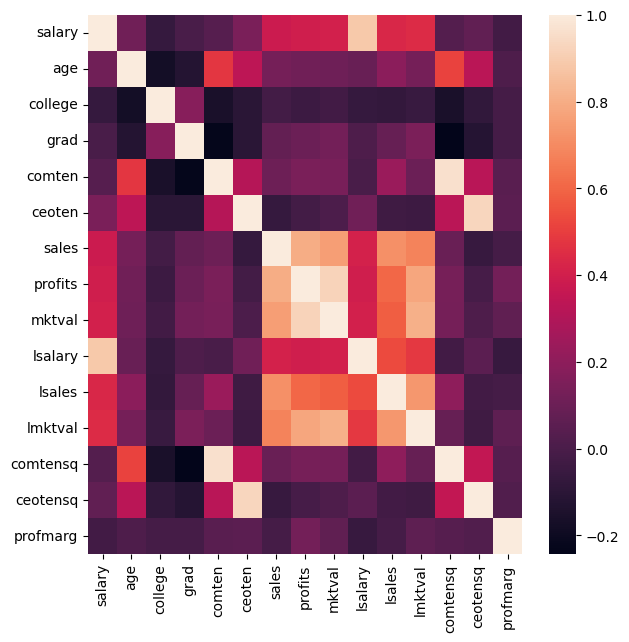

In [36]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr())
plt.show()

In [60]:
X = df[[ 'age', 'college', 'grad', 'comten', 'ceoten', 'sales','profits', 'mktval', 'profmarg']]
X = stm.add_constant(X) 
y = df['salary']


model = stm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     9.544
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.15e-11
Time:                        22:48:49   Log-Likelihood:                -1300.6
No. Observations:                 176   AIC:                             2621.
Df Residuals:                     166   BIC:                             2653.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        855.8153    303.262      2.822      0.0

In [ ]:
 The R-squared value of 0.341 indicates that approximately 34.1% of the variation in salary can be explained by the independent variables in the model. 

In [61]:
X = df[[ 'age', 'college', 'grad', 'comten', 'ceoten', 'sales','profits', 'mktval', 'profmarg','lsalary', 'lsales', 'lmktval', 'comtensq','ceotensq']]
X = stm.add_constant(X) 
y = df['salary']


model = stm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           7.74e-74
Time:                        22:48:54   Log-Likelihood:                -1132.1
No. Observations:                 176   AIC:                             2294.
Df Residuals:                     161   BIC:                             2342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3865.9168    214.300    -18.040      0.0

In [ ]:
When we take lsalary (log of salary), a high a high R-squared value of 0.903 is created, indicating that the independent variables can explain a significant portion of the variation in the dependent variable, salary. 
The coefficients for most of the independent variables are not statistically significant at the 0.05 level, except for lsalary, which has a significant positive coefficient of 728.2706.